<a href="https://colab.research.google.com/github/Deri-Nugroho/Intensive-Camp-Machine-Learning-2/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Decision Tree

### Apa itu Decision Tree?
Decision Tree (Pohon Keputusan) adalah algoritma supervised learning yang digunakan untuk tugas klasifikasi dan regresi. Decision Tree memetakan keputusan dan konsekuensinya dalam bentuk struktur pohon.

Contoh Penggunaan:
*   Memprediksi apakah pelanggan akan membeli produk.
*   Menentukan apakah email adalah spam atau bukan.
*   Menentukan kelayakan kredit nasabah.


### Struktur Pohon Keputusan
*   Root Node: Node pertama yang merepresentasikan seluruh dataset.
*   Decision Node: Node tempat fitur digunakan untuk membagi data.
*   Leaf Node (Daun): Node akhir yang merepresentasikan keputusan/prediksi.

In [ ]:
# Apakah hujan?
#  ├── Ya: Bawa payung
#  └── Tidak: Tidak bawa payung

### Proses Pembentukan Pohon
1.   Memilih fitur terbaik untuk membagi data.
2.   Menggunakan metrik untuk mengevaluasi split:
*   Entropy & Information Gain (ID3, C4.5)
*   Gini Index (CART)
### Contoh Rumus:
*   Entropy(S) = -p₁ log₂ p₁ - p₂ log₂ p₂ - ...
*   Information Gain = Entropy(parent) - rata-rata Entropy(child)



### Kelebihan & Kekurangan Decision Tree
### Kelebihan:
*   Mudah dipahami dan divisualisasikan.
*   Tidak membutuhkan normalisasi data.
*   Bisa digunakan untuk data kategorikal dan numerik.

### Kekurangan:

*   Rentan terhadap overfitting.
*   Performa bisa menurun jika dataset terlalu besar & kompleks.
*   Tidak stabil (perubahan kecil bisa menghasilkan pohon berbeda).

# Contoh Program Python: Decision Tree Classifier

informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

lima baris pertama dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

akurasi model: 1.0

laporan klasifikasi:
                 precision    reca

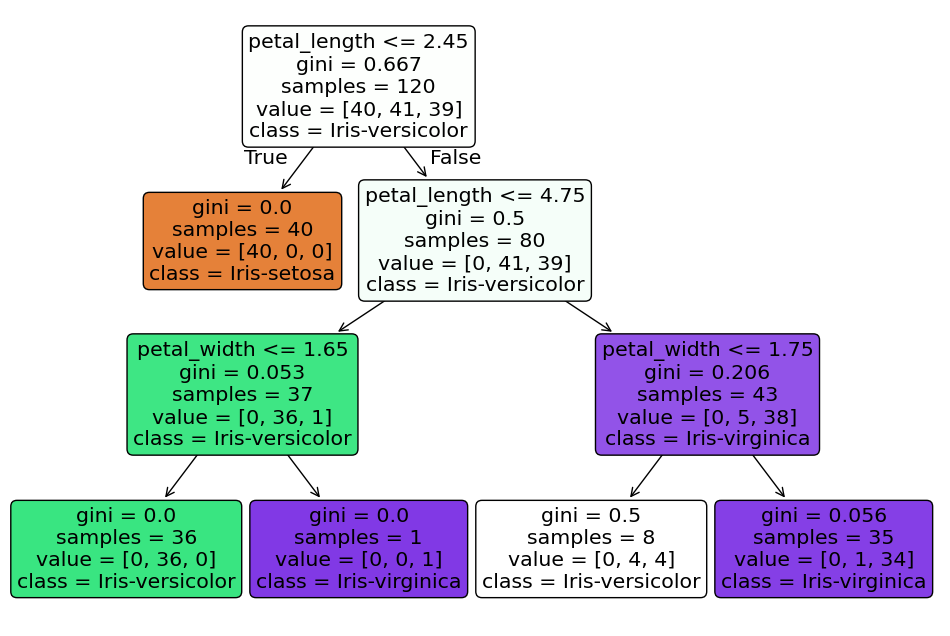

In [ ]:
# 1. impor library yang dibutuhkan
import pandas as pd                    # library untuk manipulasi data dan analisis
import numpy as np                     # library untuk operasi numerik
import matplotlib.pyplot as plt         # library untuk visualisasi
from sklearn.model_selection import train_test_split  # fungsi untuk membagi data menjadi training dan testing
from sklearn.tree import DecisionTreeClassifier, plot_tree  # model decision tree dan fungsi visualisasi
from sklearn.metrics import accuracy_score, classification_report  # metode evaluasi model

# 2. mengambil dataset iris secara online
# url dataset iris dari uci machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# menentukan nama kolom sesuai dengan deskripsi dataset
kolom = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# membaca dataset dari url dan menambahkan nama kolom
data_iris = pd.read_csv(url, header=None, names=kolom)

# 3. eksplorasi awal dataset
print("informasi dataset:")
print(data_iris.info())

print("\nlima baris pertama dataset:")
print(data_iris.head())

# 4. persiapan data untuk training dan testing
X = data_iris.drop("species", axis=1)  # X: data fitur, yaitu semua kolom kecuali 'species'
y = data_iris["species"]               # y: label target, yaitu kolom 'species'

# membagi dataset menjadi data latih dan data uji dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. pembuatan dan pelatihan model decision tree
# membuat model decision tree dengan kedalaman maksimum 3 untuk mencegah overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# melatih model dengan data latih
model.fit(X_train, y_train)

# 6. prediksi menggunakan data uji
y_pred = model.predict(X_test)

# 7. evaluasi performa model
akurasi = accuracy_score(y_test, y_pred)
print("\nakurasi model:", akurasi)
print("\nlaporan klasifikasi:")
print(classification_report(y_test, y_pred))

# 8. visualisasi decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()


In [ ]:
# 9. input data manual untuk prediksi
print("\nMasukkan data untuk menguji model:")
sepal_length = float(input("Masukkan sepal length: "))
sepal_width = float(input("Masukkan sepal width: "))
petal_length = float(input("Masukkan petal length: "))
petal_width = float(input("Masukkan petal width: "))

# Membuat DataFrame dari input pengguna
data_input = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                          columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Melakukan prediksi
prediksi = model.predict(data_input)
print("\nHasil prediksi: ", prediksi[0])


Masukkan data untuk menguji model:

Hasil prediksi:  Iris-virginica


## Overfitting
Overfitting terjadi saat model terlalu kompleks dan mengikuti noise data.

Solusi:

*   Pre-pruning: Batasi kedalaman pohon (misal max_depth=3).



# Perbandingan dengan Algoritma Lain
| Algoritma           | Interpretabilitas | Akurasi  | Kelebihan                        |
| ------------------- | ----------------- | -------- | -------------------------------- |
| Decision Tree       | Tinggi            | Menengah | Mudah dipahami, cepat            |
| Random Forest       | Rendah            | Tinggi   | Lebih stabil, akurasi lebih baik |
| Logistic Regression | Sedang            | Tinggi   | Baik untuk data linier           |
